## Importing Libraries

In [ ]:
!pip install vaderSentiment
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

## Loading the Dataset

In [ ]:
file_path = '/content/Electricy_Tariff.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.head()

,Timestamp,Name,What is your age group? / आपकी आयु वर्ग क्या है?,Which district of Chhattisgarh do you reside in?/ आप छत्तीसगढ़ के किस जिले में रहते हैं?,What is your occupation? / आपका पेशा क्या है?,What is your average monthly electricity bill? / आपका औसत मासिक बिजली बिल कितना है?,Have you noticed a significant increase in your electricity bill recently? / क्या आपने हाल ही में बिजली बिल में उल्लेखनीय वृद्धि देखी है?,"How do you feel about the recent electricity tariff hike? (1 = Very Unhappy, 5 = Very Satisfied) / आप हाल की बिजली दर वृद्धि के बारे में कैसा महसूस करते हैं? (1 = बहुत असंतुष्ट, 5 = बहुत संतुष्ट)","To what extent has it affected your budget?\nबिजली दर वृद्धि ने आपके मासिक बजट को कितनी प्रभावित किया है? (1 = Not at all / बिल्कुल नहीं, 5 = बहुत अधिक)",Do you think the increase is justified? / क्या आपको लगता है कि यह बढ़ोतरी उचित है?,(Optional) Your contact information (email or phone)\n(वैकल्पिक) अपना संपर्क विवरण (ईमेल या फोन नंबर),What are your thoughts on the electricity tariff hike? बिजली दर वृद्धि के बारे में आपके क्या विचार हैं?,"Were you aware of the tariff hike before receiving your bill? How were you informed? / क्या आपको बिजली दर वृद्धि के बारे में पहले से जानकारी थी? यदि हां, तो कैसे?","If you could send a message to the electricity board or government, what would you say? / यदि आप सरकार या बिजली विभाग को कोई संदेश देना चाहें, तो वह क्या होगा?",How has the increased electricity bill affected your daily life or monthly budget?
0,2025-08-04 11:41:40.660,Bhavya Shukla,18-25,Raipur,Student / छात्र,₹501–₹1000,Yes,2,3,No/नहीं,NaN,"Neutral, the cost of maintenance has also incr...","Yes,Newspaper",NaN,0.0
1,2025-08-04 11:55:50.601,Vidya Zade,18-25,Durg,Student / छात्र,₹501–₹1000,Yes,2,3,No/नहीं,NaN,Power is being extended to remote (LWE) areas,no,NaN,0.0
2,2025-08-04 11:57:10.710,Farhan Ahmed Khan,41-60,Bilaspur,Salaried Employee / नौकरीपेशा,₹501–₹1000,No,1,1,No/नहीं,farhanraipur@gmail.com,Very expensive for middle class family,"Yes,Newspaper",NaN,0.0
3,2025-08-04 12:18:20.844,Sayma,18-25,Durg,Student / छात्र,Above ₹2000 / ₹2000 से अधिक,Yes,2,4,Unable to reduce/ कम करना संभव नहीं,NaN,"Neutral, the cost of maintenance has also incr...",no,NaN,0.0
4,2025-08-04 12:20:47.596,Neelam Sahu,18-25,Baloda bazar,Student / छात्र,Below ₹500 / ₹500 से कम,No,3,3,No/नहीं,NaN,Very expensive for middle class family,"yes,Newspaper",NaN,0.0


In [ ]:
#Printing the column names
for col in df.columns:
    print(repr(col))

'Timestamp'
'Name'
'What is your age group? / आपकी आयु वर्ग क्या है? '
'Which district of Chhattisgarh do you reside in?/ आप छत्तीसगढ़ के किस जिले में रहते हैं?  '
'   What is your occupation? / आपका पेशा क्या है?  '
' What is your average monthly electricity bill? / आपका औसत मासिक बिजली बिल कितना है?  '
'Have you noticed a significant increase in your electricity bill recently? / क्या आपने हाल ही में बिजली बिल में उल्लेखनीय वृद्धि देखी है?  '
'How do you feel about the recent electricity tariff hike? (1 = Very Unhappy, 5 = Very Satisfied) / आप हाल की बिजली दर वृद्धि के बारे में कैसा महसूस करते हैं? (1 = बहुत असंतुष्ट, 5 = बहुत संतुष्ट) '
'  To what extent has it affected your budget?\nबिजली दर वृद्धि ने आपके मासिक बजट को कितनी प्रभावित किया है?   (1 = Not at all / बिल्कुल नहीं, 5 = बहुत अधिक) '
'Do you think the increase is justified? / क्या आपको लगता है कि यह बढ़ोतरी उचित है?  '
' (Optional) Your contact information (email or phone)\n(वैकल्पिक) अपना संपर्क विवरण (ईमेल या फोन नंबर)  '

In [ ]:
import re
# Clean all column names thoroughly
def clean_column(col):
    # Replace all kinds of whitespace with a single space, and strip leading/trailing
    return re.sub(r'\s+', ' ', col).strip()
df.columns = [clean_column(c) for c in df.columns]

In [ ]:
#Renaming the columns
df.rename(columns={
    'What is your age group? / आपकी आयु वर्ग क्या है?': 'Age',
    'Which district of Chhattisgarh do you reside in?/ आप छत्तीसगढ़ के किस जिले में रहते हैं?': 'District',
    'What is your occupation? / आपका पेशा क्या है?': 'Occupation',
    'What is your average monthly electricity bill? / आपका औसत मासिक बिजली बिल कितना है?': 'Monthly Bill',
    'Have you noticed a significant increase in your electricity bill recently? / क्या आपने हाल ही में बिजली बिल में उल्लेखनीय वृद्धि देखी है?': 'Noticed Increase',
    'How do you feel about the recent electricity tariff hike? (1 = Very Unhappy, 5 = Very Satisfied) / आप हाल की बिजली दर वृद्धि के बारे में कैसा महसूस करते हैं? (1 = बहुत असंतुष्ट, 5 = बहुत संतुष्ट)': 'Tariff Feeling (1-5)',
    'To what extent has it affected your budget? बिजली दर वृद्धि ने आपके मासिक बजट को कितनी प्रभावित किया है? (1 = Not at all / बिल्कुल नहीं, 5 = बहुत अधिक)': 'Budget Impact (1-5)',
    'Do you think the increase is justified? / क्या आपको लगता है कि यह बढ़ोतरी उचित है?': 'Justified?',
    '(Optional) Your contact information (email or phone) (वैकल्पिक) अपना संपर्क विवरण (ईमेल या फोन नंबर)': 'Contact Info',
    'What are your thoughts on the electricity tariff hike? बिजली दर वृद्धि के बारे में आपके क्या विचार हैं?': 'Thoughts on Hike',
    'Were you aware of the tariff hike before receiving your bill? How were you informed? / क्या आपको बिजली दर वृद्धि के बारे में पहले से जानकारी थी? यदि हां, तो कैसे?': 'Awareness of Hike',
    'If you could send a message to the electricity board or government, what would you say? / यदि आप सरकार या बिजली विभाग को कोई संदेश देना चाहें, तो वह क्या होगा?': 'Message to Govt',
    'How has the increased electricity bill affected your daily life or monthly budget?': 'Effect on Daily Life'
}, inplace=True)

In [ ]:
#Printing the column names
print(df.columns.tolist())

['Timestamp', 'Name', 'Age', 'District', 'Occupation', 'Monthly Bill', 'Noticed Increase', 'Tariff Feeling (1-5)', 'Budget Impact (1-5)', 'Justified?', 'Contact Info', 'Thoughts on Hike', 'Awareness of Hike', 'Message to Govt', 'Effect on Daily Life']


In [ ]:
df.head()

,Timestamp,Name,Age,District,Occupation,Monthly Bill,Noticed Increase,Tariff Feeling (1-5),Budget Impact (1-5),Justified?,Contact Info,Thoughts on Hike,Awareness of Hike,Message to Govt,Effect on Daily Life
0,2025-08-04 11:41:40.660,Bhavya Shukla,18-25,Raipur,Student / छात्र,₹501–₹1000,Yes,2,3,No/नहीं,NaN,"Neutral, the cost of maintenance has also incr...","Yes,Newspaper",NaN,0.0
1,2025-08-04 11:55:50.601,Vidya Zade,18-25,Durg,Student / छात्र,₹501–₹1000,Yes,2,3,No/नहीं,NaN,Power is being extended to remote (LWE) areas,no,NaN,0.0
2,2025-08-04 11:57:10.710,Farhan Ahmed Khan,41-60,Bilaspur,Salaried Employee / नौकरीपेशा,₹501–₹1000,No,1,1,No/नहीं,farhanraipur@gmail.com,Very expensive for middle class family,"Yes,Newspaper",NaN,0.0
3,2025-08-04 12:18:20.844,Sayma,18-25,Durg,Student / छात्र,Above ₹2000 / ₹2000 से अधिक,Yes,2,4,Unable to reduce/ कम करना संभव नहीं,NaN,"Neutral, the cost of maintenance has also incr...",no,NaN,0.0
4,2025-08-04 12:20:47.596,Neelam Sahu,18-25,Baloda bazar,Student / छात्र,Below ₹500 / ₹500 से कम,No,3,3,No/नहीं,NaN,Very expensive for middle class family,"yes,Newspaper",NaN,0.0


In [ ]:
#Deleting the unnecessary columns
df.drop(['Timestamp', 'Contact Info', 'Message to Govt', 'Effect on Daily Life'], axis=1, inplace=True)

In [ ]:
#Printing the first rows of dataset
df.head()

,Name,Age,District,Occupation,Monthly Bill,Noticed Increase,Tariff Feeling (1-5),Budget Impact (1-5),Justified?,Thoughts on Hike,Awareness of Hike
0,Bhavya Shukla,18-25,Raipur,Student / छात्र,₹501–₹1000,Yes,2,3,No/नहीं,"Neutral, the cost of maintenance has also incr...","Yes,Newspaper"
1,Vidya Zade,18-25,Durg,Student / छात्र,₹501–₹1000,Yes,2,3,No/नहीं,Power is being extended to remote (LWE) areas,no
2,Farhan Ahmed Khan,41-60,Bilaspur,Salaried Employee / नौकरीपेशा,₹501–₹1000,No,1,1,No/नहीं,Very expensive for middle class family,"Yes,Newspaper"
3,Sayma,18-25,Durg,Student / छात्र,Above ₹2000 / ₹2000 से अधिक,Yes,2,4,Unable to reduce/ कम करना संभव नहीं,"Neutral, the cost of maintenance has also incr...",no
4,Neelam Sahu,18-25,Baloda bazar,Student / छात्र,Below ₹500 / ₹500 से कम,No,3,3,No/नहीं,Very expensive for middle class family,"yes,Newspaper"


In [ ]:
# Prints the number of rows and columns in the dataset (rows, columns)
print("Dataset Shape:", df.shape)
# Prints the data type of each column (e.g., object, int64, float64)
print("\nData Types:\n", df.dtypes)
# Prints the count of missing (NaN) values in each column
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (51, 11)

Data Types:
 Name                    object
Age                     object
District                object
Occupation              object
Monthly Bill            object
Noticed Increase        object
Tariff Feeling (1-5)     int64
Budget Impact (1-5)      int64
Justified?              object
Thoughts on Hike        object
Awareness of Hike       object
dtype: object

Missing Values:
 Name                    0
Age                     0
District                0
Occupation              0
Monthly Bill            0
Noticed Increase        0
Tariff Feeling (1-5)    0
Budget Impact (1-5)     0
Justified?              0
Thoughts on Hike        0
Awareness of Hike       0
dtype: int64


In [ ]:
#Summary Satistics
print("\nSummary Stats:\n", df.describe(include='all'))


Summary Stats:
                    Name    Age District       Occupation Monthly Bill  \
count                51     51       51               51           51   
unique               50      4       13                5            4   
top     Dinesh Meshram   18-25   Raipur  Student / छात्र   ₹501–₹1000   
freq                  2     19       13               15           22   
mean                NaN    NaN      NaN              NaN          NaN   
std                 NaN    NaN      NaN              NaN          NaN   
min                 NaN    NaN      NaN              NaN          NaN   
25%                 NaN    NaN      NaN              NaN          NaN   
50%                 NaN    NaN      NaN              NaN          NaN   
75%                 NaN    NaN      NaN              NaN          NaN   
max                 NaN    NaN      NaN              NaN          NaN   

       Noticed Increase  Tariff Feeling (1-5)  Budget Impact (1-5) Justified?  \
count                51  

## Univariate Analysis

## Age Group Distribution

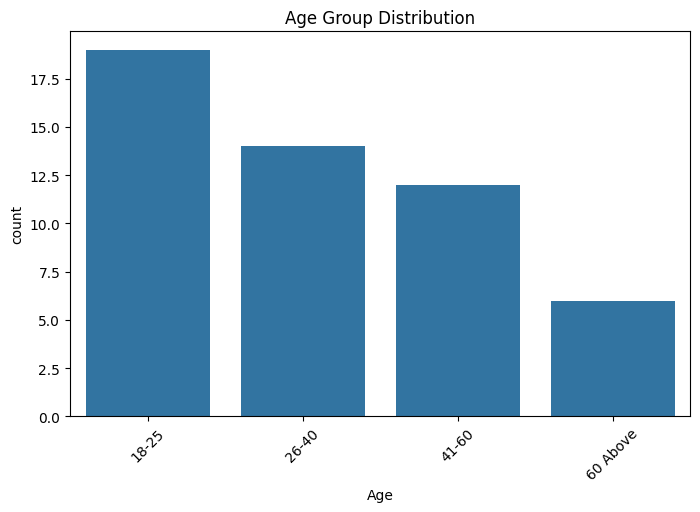

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age', order=df['Age'].value_counts().index)
plt.title("Age Group Distribution")
plt.xticks(rotation=45)
plt.show()

## Plot Age Group Distribution as a Pie Chart

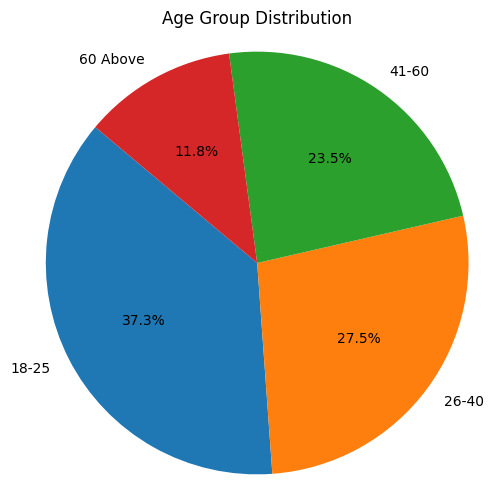

In [ ]:
# Count the number of occurrences for each age
age_counts = df['Age'].value_counts()
# Plot as pie chart
plt.figure(figsize=(6,6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Age Group Distribution")
plt.axis('equal')  # Ensures pie is drawn as a circle.
plt.show()

In [ ]:
# Create a mapping for all variations to the correct name
district_map = {
    'raipur': 'Raipur',
    'raipir': 'Raipur',
    'raipr': 'Raipur',
    'rqipur': 'Raipur',
    'yes': 'Raipur',  # assuming "Yes" was mistakenly entered instead of district
    'durg': 'Durg',
    'bilaspur': 'Bilaspur',
    'baloda bazar': 'Baloda Bazar',
    'rajnandgaon': 'Rajnandgaon'
}

# Standardize the District column
df['District'] = df['District'].str.strip().str.lower().map(district_map).fillna(df['District'])

# Optional: Ensure first letter capitalized for uniformity
df['District'] = df['District'].str.title()


## District Distribution

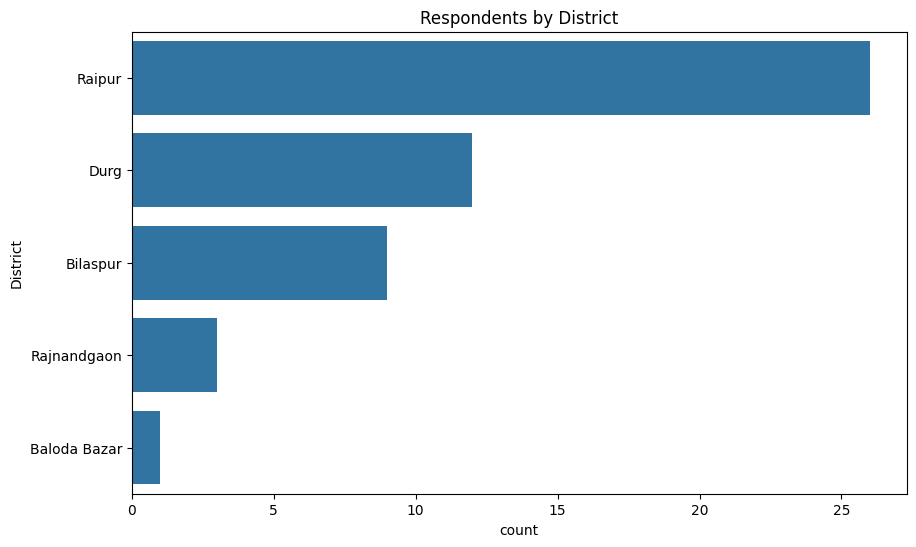

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='District', order=df['District'].value_counts().index)
plt.title("Respondents by District")
plt.show()

## Occupation Distribution


In [ ]:
# Create a mapping for all variations to the correct name
occupation_map = {
    'Student / छात्र': 'Student',
    'Salaried Employee / नौकरीपेशा': 'Salaried Employee',
    'Small Business Owner / छोटे व्यवसायी': 'Small Business Owner',
    'Homemaker / गृहिणी': 'Homemaker',
}
# Standardize the District column
df['Occupation'] = df['Occupation'].str.strip().str.lower().map(district_map).fillna(df['Occupation'])

# Optional: Ensure first letter capitalized for uniformity
df['Occupation'] = df['Occupation'].str.title()


In [ ]:
# Create a mapping for all variations to the correct name
occupation_map = {
    'student / छात्र': 'Student',
    'salaried employee / नौकरीपेशा': 'Salaried Employee',
    'small business owner / छोटे व्यवसायी': 'Small Business Owner',
    'homemaker / गृहिणी': 'Homemaker',
}

# Standardize the Occupation column
df['Occupation'] = (
    df['Occupation']
    .str.strip()
    .str.lower()
    .map(occupation_map)  # use the correct mapping dictionary
    .fillna(df['Occupation'])
)

# Optional: Ensure first letter capitalized for uniformity
df['Occupation'] = df['Occupation'].str.title()


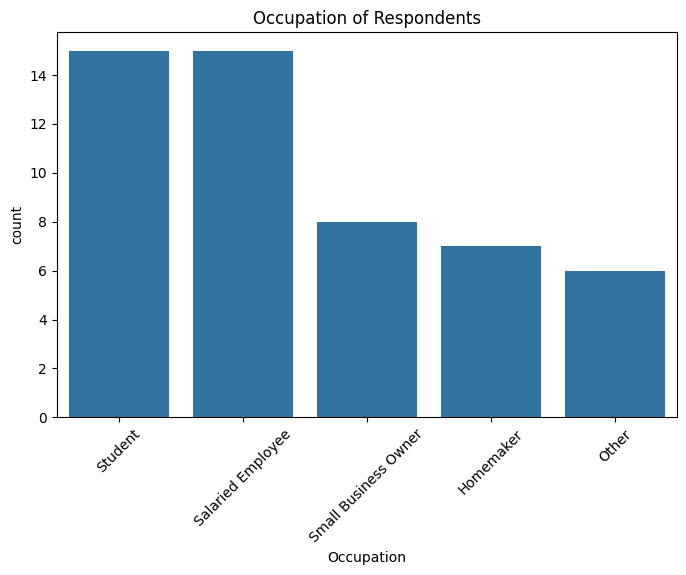

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index)
plt.title("Occupation of Respondents")
plt.xticks(rotation=45)
plt.show()

## Electricity Bill Analysis

## Average Monthly Electricity Bill Distribution

In [ ]:
# Cleaning a column to remove Hindi part after '/'
df['Monthly Bill'] = df['Monthly Bill'].str.split('/').str[0].str.strip()

# Converting into consistent format
df['Monthly Bill'] = df['Monthly Bill'].str.replace('₹', 'Rs ', regex=False)

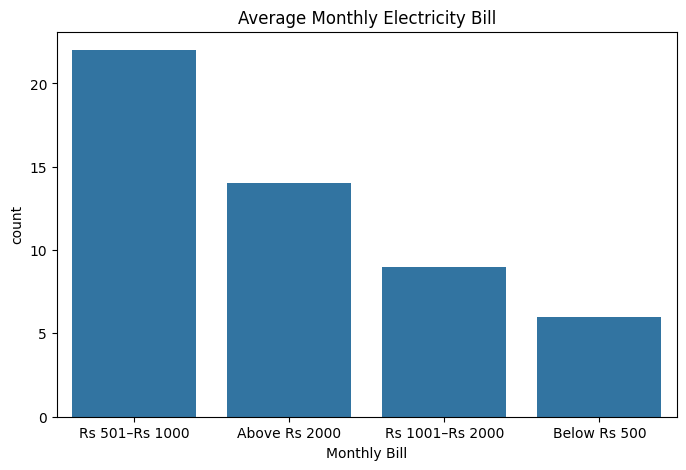

In [ ]:
# Monthly Bill Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Monthly Bill', order=df['Monthly Bill'].value_counts().index)
plt.title("Average Monthly Electricity Bill")
plt.show()

## Tariff Feeling

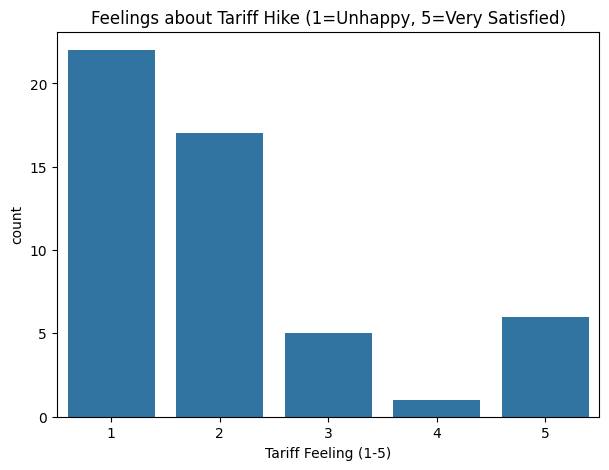

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Tariff Feeling (1-5)')
plt.title("Feelings about Tariff Hike (1=Unhappy, 5=Very Satisfied)")
plt.show()

## Budget Impact

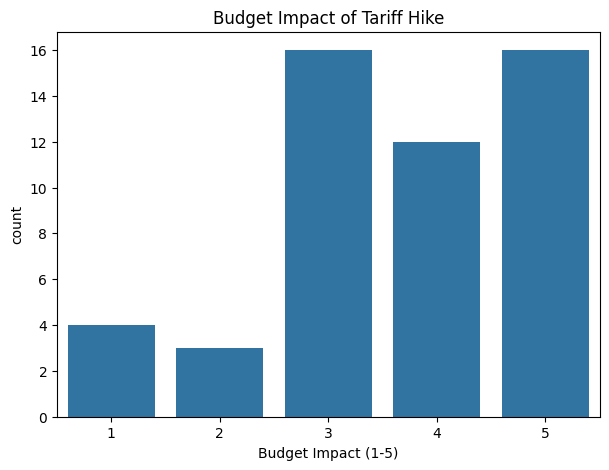

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Budget Impact (1-5)')
plt.title("Budget Impact of Tariff Hike(1=Not Affected, 5= Highly Affected)")
plt.show()

## Distribution of Public Opinion on Budget Impact of Tariff Hike (Scale 1–5)

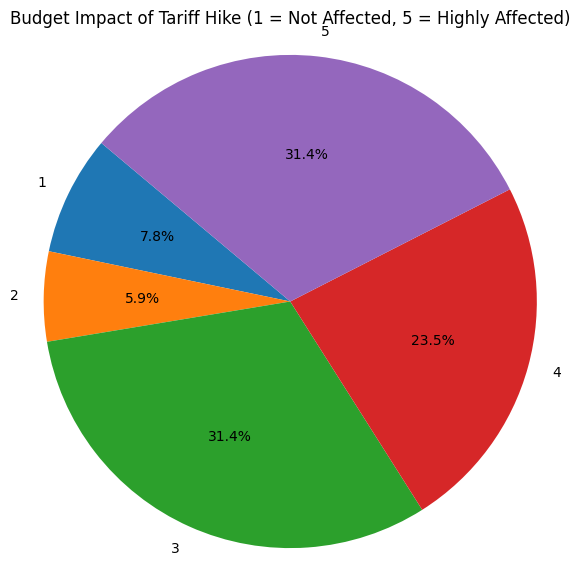

In [ ]:

# Count the values for each rating (1 to 5)
impact_counts = df['Budget Impact (1-5)'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(impact_counts, labels=impact_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Budget Impact of Tariff Hike (1 = Not Affected, 5 = Highly Affected)")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()


## Bivariate Analysis


## Age group vs Tariff Feeling

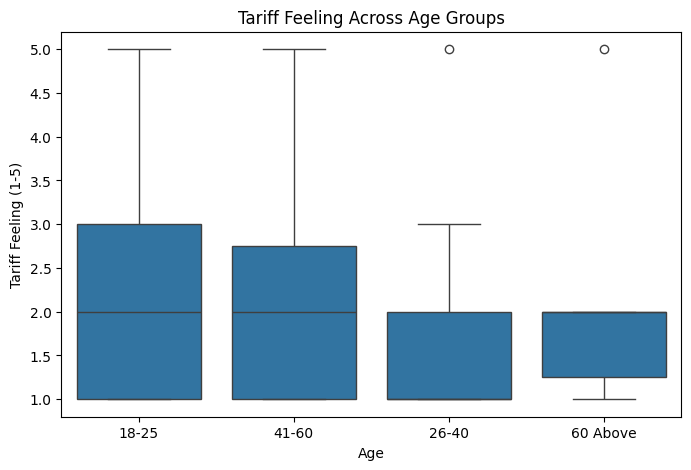

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Age', y='Tariff Feeling (1-5)')
plt.title("Tariff Feeling Across Age Groups")
plt.show()


## Occupation vs Budget Impact

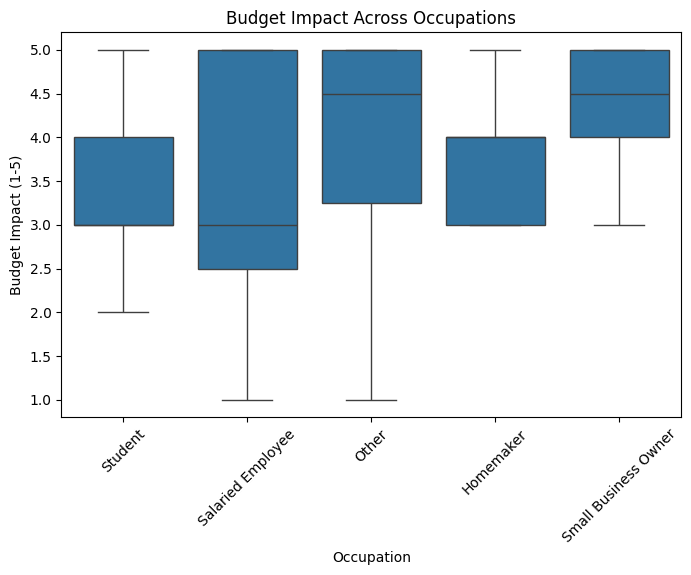

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Occupation', y='Budget Impact (1-5)')
plt.title("Budget Impact Across Occupations")
plt.xticks(rotation=45)
plt.show()

## District vs Justified?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

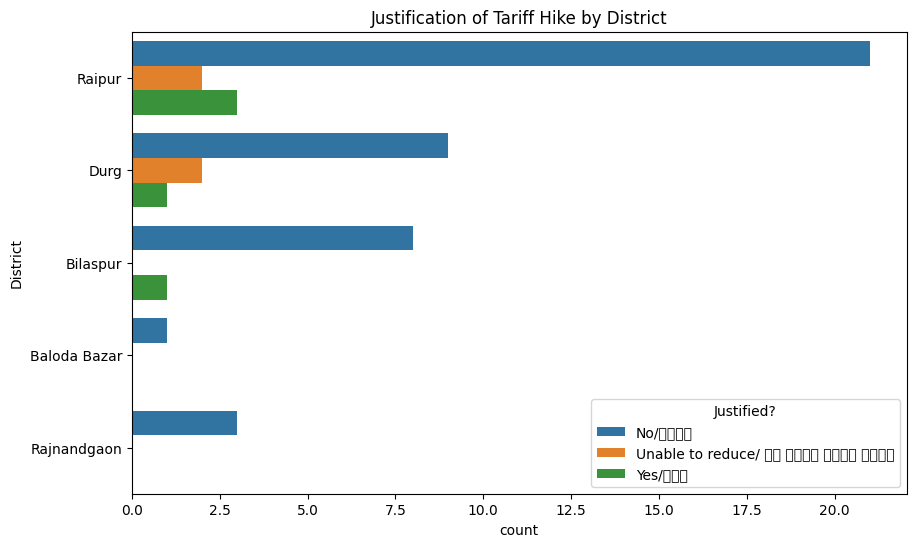

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='District', hue='Justified?')
plt.title("Justification of Tariff Hike by District")
plt.show()

## Awareness Analysis

/tmp/ipython-input-3075797849.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Awareness of Hike', order=order, palette='viridis')


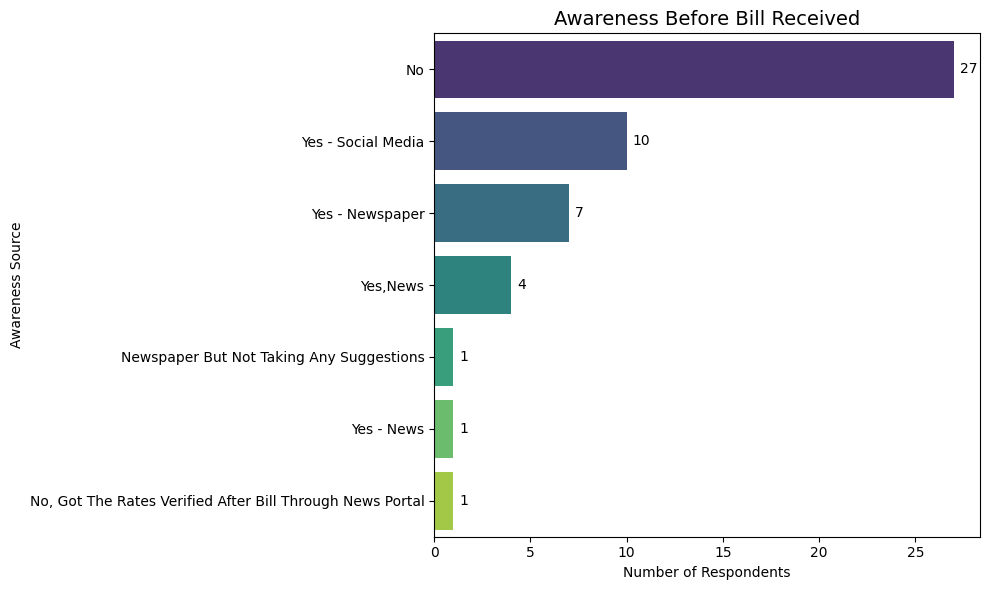

In [ ]:
# Clean up category text
df['Awareness of Hike'] = df['Awareness of Hike'].str.strip().str.title()

# Merge similar responses manually
replace_map = {
    'Yes.Newspaper': 'Yes - Newspaper',
    'Yes,Newspaper': 'Yes - Newspaper',
    'Yes.Newspaper': 'Yes - Newspaper',
    'Yes News': 'Yes - News',
    'Yes,Social Media': 'Yes - Social Media',
    'No. Got The Rates Verified After Bill Through Portal': 'No - Verified After Bill',
}
df['Awareness of Hike'] = df['Awareness of Hike'].replace(replace_map)

# Sort by frequency
order = df['Awareness of Hike'].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Awareness of Hike', order=order, palette='viridis')

# Add count labels
for i, v in enumerate(df['Awareness of Hike'].value_counts()):
    plt.text(v + 0.3, i, str(v), va='center')

plt.title("Awareness Before Bill Received", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Awareness Source")
plt.tight_layout()
plt.show()


## Sentiment/Thoughts Text Analysis (basic)

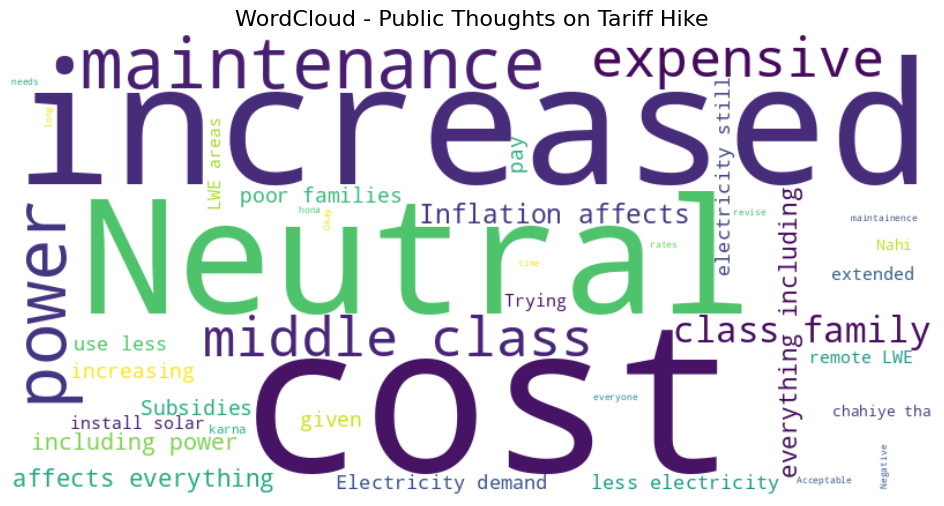

In [ ]:
from wordcloud import WordCloud, STOPWORDS

thoughts_text = " ".join(str(t) for t in df['Thoughts on Hike'].dropna())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(thoughts_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Public Thoughts on Tariff Hike", fontsize=16)
plt.show()

## Correlation Heatmap (for numeric data)

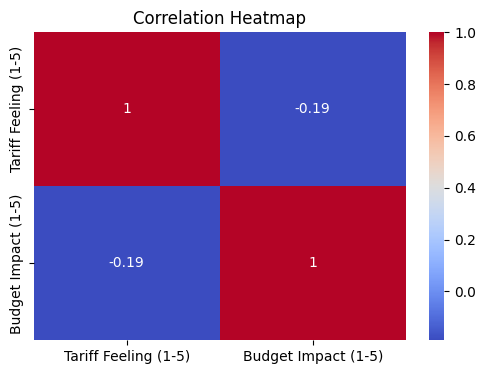

In [ ]:
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()